# Workshop on Domain-Specific Lanugages for Performance-Portable Weather and Climate Models

## Session 2B: Intro to Conditionals and Builtins

This notebook is provides an introduction to conditional statements in GT4PY

In [2]:
import matplotlib.pyplot as plt
import numpy as np

import gt4py
from gt4py import gtscript

## Scalar Conditionals
- Conditionals can be specified with a scalar or a field.
- Scalar conditionals behave fairly intuitively

In [20]:
@gtscript.stencil(backend="numpy")
def conditional_stencil(
    in_storage: gtscript.Field[float], out_storage: gtscript.Field[float], c: float
):

    with computation(PARALLEL), interval(...):
        if c > 0.:
            out_storage = (
                in_storage[0, 0, 0] + in_storage[1, 0, 0]
            )
        else:
            out_storage = in_storage[-1, 0, 0] + in_storage[0, 0, 0] + in_storage[1, 0, 0]

Initial Condition


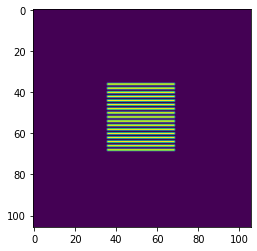

Output with c > 0


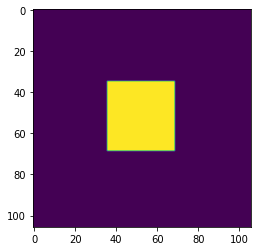

Output with c <= 0


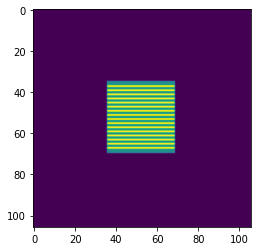

In [27]:
# Setting up the domain
nx = 100
halo = 3
shape = (nx+2*halo, nx+2*halo, 1)

# and the storages
in_storage = gt4py.storage.zeros(
    shape=shape,
    default_origin=(0, 0, 0),
    dtype=float,
    backend="numpy",
)
in_storage.data[halo + nx // 3 : halo +  2 * nx  // 3 : 2, halo + nx // 3 : halo + 2 * nx // 3, :] = 2
# in_storage.data[halo + nx // 3 + 1 : halo + 2 * nx // 3 :2, halo + nx // 3 : halo + 2 * nx // 3, :] = -1
out_storage = gt4py.storage.zeros(
    shape=shape,
    default_origin=(0, 0, 0),
    dtype=float,
    backend="numpy",
)

# running the computataion
print("Initial Condition")
plt.imshow(in_storage.data[:,:,0])
plt.show()

conditional_stencil(in_storage, out_storage, 1.0, origin=(halo-1, halo-1, 0), domain=(nx+1, nx+1, 1))

print("Output with c > 0")
plt.imshow(out_storage.data[:,:,0])
plt.show()

conditional_stencil(in_storage, out_storage, -1.0, origin=(halo-1, halo-1, 0), domain=(nx+1, nx+1, 1))

print("Output with c <= 0")
plt.imshow(out_storage.data[:,:,0])
plt.show()

## Fields conditionals
- Field conditionals use a mask to check branching
- This allows some fun referential tech

Initial Condition


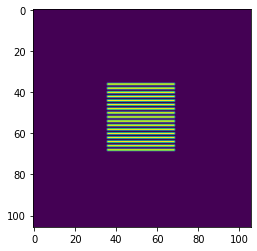

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0.
 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Output


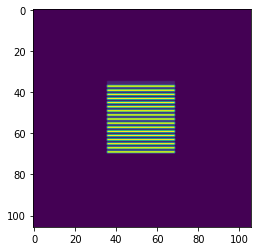

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.
  1. 10.  1. 10.  1. 10.  1. 10.  1. 10.  1. 10.  1. 10.  1. 10.  1. 10.
  1. 10.  1. 10.  1. 10.  1. 10.  1. 10.  1. 10.  1. 10.  1. 10.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


In [34]:
@gtscript.stencil(backend="numpy")
def field_conditional_stencil(
    in_storage: gtscript.Field[float], out_storage: gtscript.Field[float]
):

    with computation(PARALLEL), interval(...):
        if in_storage[-1, 0, 0] > 0.:
            out_storage = 10
        else:
            out_storage = in_storage[0, 0, 0] + in_storage[1, 0, 0]

# Setting up the domain
nx = 100
halo = 3
shape = (nx+2*halo, nx+2*halo, 1)

# and the storages
in_storage = gt4py.storage.zeros(
    shape=shape,
    default_origin=(0, 0, 0),
    dtype=float,
    backend="numpy",
)
in_storage.data[halo + nx // 3 : halo +  2 * nx  // 3 : 2, halo + nx // 3 : halo + 2 * nx // 3, :] = 1
# in_storage.data[halo + nx // 3 + 1 : halo + 2 * nx // 3 :2, halo + nx // 3 : halo + 2 * nx // 3, :] = -1
out_storage = gt4py.storage.zeros(
    shape=shape,
    default_origin=(0, 0, 0),
    dtype=float,
    backend="numpy",
)

# running the computataion
print("Initial Condition")
plt.imshow(in_storage.data[:,:,0])
plt.show()
print(in_storage.data[:,45,0])

field_conditional_stencil(in_storage, out_storage, origin=(halo-1, halo-1, 0), domain=(nx+1, nx+1, 1))

print("Output")
plt.imshow(out_storage.data[:,:,0])
plt.show()
print(out_storage.data[:,45,0])

## Example Application ##
Adding a flux limiter to the diffusion stencils:

Initial Condition


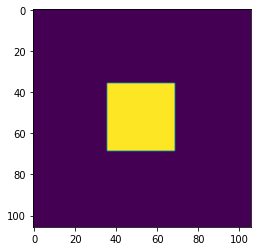

Output


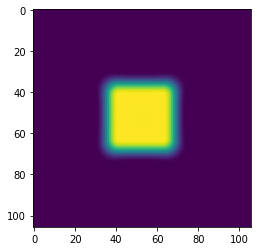

In [35]:
@gtscript.stencil(backend="numpy")
def flux_limit_stencil(
    in_storage: gtscript.Field[float], out_storage: gtscript.Field[float], alpha: float
):

    with computation(PARALLEL), interval(...):
        lap = (
            -4.0 * in_storage[0, 0, 0]
            + in_storage[1, 0, 0]
            + in_storage[-1, 0, 0]
            + in_storage[0, 1, 0]
            + in_storage[0, -1, 0]
        )
        
        x_flux = lap[1, 0, 0] - lap[0, 0, 0]
        y_flux = lap[0, 1, 0] - lap[0, 0, 0]
        x_flux = 0. if (x_flux[0, 0, 0] * (in_storage[1, 0, 0] - in_storage[0, 0, 0]) > 0.) else x_flux
        y_flux = 0. if (y_flux[0, 0, 0] * (in_storage[0, 1, 0] - in_storage[0, 0, 0]) > 0.) else y_flux
        
        out_storage = in_storage - alpha * (x_flux[0, 0, 0] - x_flux[-1, 0, 0] + y_flux[0, 0, 0] - y_flux[0, -1, 0])
        

nx = 100
halo = 3
shape = (nx + 2 * halo, nx + 2 * halo, 1)
in_storage = gt4py.storage.zeros(
    shape=shape,
    default_origin=(0, 0, 0),
    dtype=float,
    backend="numpy",
)
in_storage.data[halo + nx // 3 : halo + 2 * nx // 3, halo + nx // 3 : halo + 2 * nx // 3, :] = 1
out_storage = gt4py.storage.zeros(
    shape=shape,
    default_origin=(0, 0, 0),
    dtype=float,
    backend="numpy",
)

print("Initial Condition")
plt.imshow(in_storage.data[:, :, 0])
plt.show()

alpha = 1.0 / 32.0
for i in range(500):
    flux_limit_stencil(
        in_storage, out_storage, alpha, origin=(halo, halo, 0), domain=(nx, nx, 1)
    )
    in_storage.data[:] = out_storage.data[:]

print("Output")
plt.imshow(out_storage.data[:, :, 0])
plt.show()

## Example 2
Filling in negative values in a field

Initial Condition


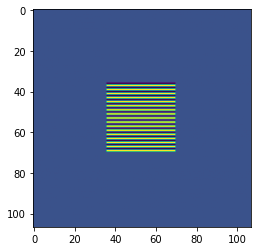

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 -1.  3. -1.  3. -1.  3. -1.  3. -1.  3. -1.  3. -1.  3. -1.  3. -1.  3.
 -1.  3. -1.  3. -1.  3. -1.  3. -1.  3. -1.  3. -1.  3. -1.  3.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.] 0.10096951698838326
Output


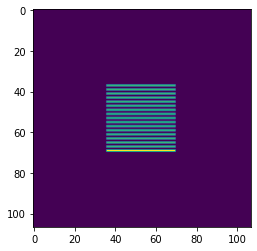

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 2. 0. 2. 0. 2. 0. 2. 0. 2.
 0. 2. 0. 2. 0. 2. 0. 2. 0. 2. 0. 2. 0. 2. 0. 2. 0. 2. 0. 2. 0. 3. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 0.10393920866451219


In [27]:
@gtscript.stencil(backend="numpy")
def flux_limit_stencil(
    in_storage: gtscript.Field[float], out_storage: gtscript.Field[float], alpha: float
):

    with computation(PARALLEL), interval(...):
        lap = (
            -4.0 * in_storage[0, 0, 0]
            + in_storage[1, 0, 0]
            + in_storage[-1, 0, 0]
            + in_storage[0, 1, 0]
            + in_storage[0, -1, 0]
        )
        
        x_flux = lap[1, 0, 0] - lap[0, 0, 0]
        y_flux = lap[0, 1, 0] - lap[0, 0, 0]
        x_flux = 0. if (x_flux[0, 0, 0] * (in_storage[1, 0, 0] - in_storage[0, 0, 0]) > 0.) else x_flux
        y_flux = 0. if (y_flux[0, 0, 0] * (in_storage[0, 1, 0] - in_storage[0, 0, 0]) > 0.) else y_flux
        
        out_storage = in_storage - alpha * (x_flux[0, 0, 0] - x_flux[-1, 0, 0] + y_flux[0, 0, 0] - y_flux[0, -1, 0])

@gtscript.stencil(backend="numpy")
def fill_horizontal(
    in_storage: gtscript.Field[float], out_storage: gtscript.Field[float]
):
    with computation(PARALLEL), interval(...):
        fix_forward = 0.
        fix_backward = 0.
        if in_storage[0, 0, 0] < 0:
            if in_storage[-1, 0, 0] > 0.:
                fix_forward = min(abs(in_storage[0, 0, 0]), in_storage[-1, 0, 0])
                in_storage[0, 0, 0] = in_storage[0, 0, 0] + fix_forward[0, 0, 0]
                
        if fix_forward[1, 0, 0] != 0:
            in_storage[0, 0, 0] = in_storage[0, 0, 0] - fix_forward[1, 0, 0]
        
        if in_storage[0, 0, 0] < 0:
            if in_storage[1, 0, 0] >= 0.:
                fix_backward = min(abs(in_storage[0, 0, 0]), in_storage[1, 0, 0])
                in_storage[0, 0, 0] = in_storage[0, 0, 0] + fix_backward[0, 0, 0]
                
        if fix_backward[1, 0, 0] != 0:
            in_storage[0, 0, 0] = in_storage[0, 0, 0] - fix_backward[-1, 0, 0]
                
@gtscript.stencil(backend="numpy")
def fill_vertical(
    in_storage: gtscript.Field[float], out_storage: gtscript.Field[float],
):
    with computation(FORWARD), interval(0,1):
        if in_storage[0, 0 0] < 0.0:
            fix_previous[0, 0, 0] = min(abs(in_storage[0, 0, 0]), in_storage[0, 0, 1])
            in_storage[0, 0, 0] = in_storage[0, 0, 0] + fix_previous[0, 0, 0]
    with computation(FORWARD), interval(1,-1):
        if fix_previous[0, 0, -1] != 0.:
            in_storage[0, 0, 0] = in_storage[0, 0, 0] - fix_previous[0, 0, -1]
        if in_storage[0, 0, 0] < 0.:
            fix_previous[0, 0, 0] = min(abs(in_storage[0, 0, 0]), in_storage[0, 0, 1])
            in_storage[0, 0, 0] = in_storage[0, 0, 0] + fix_previous[0, 0, 0]
    with computation(FORWARD), interval(-1,None):
        if fix_previous[0, 0, -1] != 0.:
            in_storage[0, 0, 0] = in_storage[0, 0, 0] - fix_previous[0, 0, -1]
    

nx = 101
halo = 3
alpha = 1.0 / 32.0
shape = (nx + 2 * halo, nx + 2 * halo, 1)
in_storage = gt4py.storage.zeros(
    shape=shape,
    default_origin=(0, 0, 0),
    dtype=float,
    backend="numpy",
)
fix_previous = gt4py.storage.zeros(
    shape=shape,
    default_origin=(0, 0, 0),
    dtype=float,
    backend="numpy",
)
in_storage.data[halo + nx // 3 + 1 : halo + 2 * nx // 3 :2, halo + nx // 3 : halo + 2 * nx // 3, :] = 3
in_storage.data[halo + nx // 3 : halo + 2 * nx // 3 :2, halo + nx // 3 : halo + 2 * nx // 3, :] = -1
out_storage = gt4py.storage.zeros(
    shape=shape,
    default_origin=(0, 0, 0),
    dtype=float,
    backend="numpy",
)

print("Initial Condition")
plt.imshow(in_storage.data[:, :, 0])
plt.show()
print(in_storage.data[:,45,0], np.mean(in_storage.data))

# for i in range(500):
#     flux_limit_stencil(in_storage, out_storage, alpha, origin=(halo, halo, 0), domain=(nx, nx, 1))

fill_horizontal(in_storage, out_storage, origin=(halo, halo, 0), domain=(nx, nx, 1))
    
print("Output")
plt.imshow(in_storage.data[:, :, 0])
plt.show()
print(in_storage.data[:,45,0], np.mean(in_storage.data))